# Aligner

In this notebook, we will automate the processing steps that start from an eq volume to an aligned volume with the frontwall facing to the screen.

## imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile 
from pathlib import Path
import os
from tqdm import tqdm
import sys
sys.path.append(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\10_code\UTvsXCT-preprocessing')
from preprocess_tools import aligner, reslicer
import dbtools as db
import pandas as pd

# Aux functions

In [4]:
def read_sequence(folder_path):
    """
    Read a sequence of TIFF files in a folder as a 3D volume.
    
    Args:
    folder_path (str): Path to the folder containing TIFF files.

    Returns:
    numpy.ndarray: A 3D array where each slice corresponds to a TIFF file.
    """

    # List and sort the TIFF files
    tiff_files = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if (f.endswith('.tiff') or f.endswith('.tif'))])

    tiff_sequence = tifffile.TiffSequence(tiff_files)
    
    # Get the total number of TIFF files
    total_files = len(tiff_files)
    
    # Read each TIFF file and update progress
    volume = []
    with tqdm(total=total_files, desc="Progress") as pbar:
        for i, file_path in enumerate(tiff_files):
            slice_data = tifffile.imread(file_path)
            volume.append(slice_data)
            
            # Update progress
            pbar.update(1)
    
    return np.array(volume)

## Files and samples preparation

# Data loading

In [3]:
filename = Path(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\02_XCT_data\Juan Ignacio\probetas\4\volume_eq')

#the output filename will be in the parent folder of the input file and named frontal_90right2.tif
output_filename = filename.parent / 'frontal_90right2.tif'

# Read the sequence of TIFF files
volume = read_sequence(filename)

#print volume shape and dtype
print(f"Volume shape: {volume.shape}")
print(f"Volume dtype: {volume.dtype}")

Progress: 100%|██████████| 3224/3224 [00:36<00:00, 87.28it/s] 


Volume shape: (3224, 1610, 240)
Volume dtype: uint8


## Aligning

We will now align the volume with the axes.

In [4]:
aligned_volume = aligner.main(volume,False)

computing otsu
Transforming
computing otsu


## Reslicing

We will now make the sample frontwall face the screen

In [ ]:
aligned_volume = reslicer.rotate_auto(aligned_volume)
aligned_volume = reslicer.reslice(aligned_volume,'Bottom')

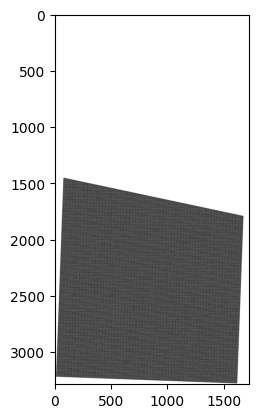

In [ ]:
plt.imshow(aligned_volume[35], cmap='gray')

## Save the volume

In [ ]:
#save the resliced volume as a TIFF file
tifffile.imwrite(output_filename, aligned_volume)